In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv("../input/ckdisease/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [110]:
df.shape #(rows,column)

(400, 26)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [112]:
df.drop('id',axis = 1,inplace = True)

In [113]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [114]:
#renaming columns for understanding
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [115]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [116]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

why is packed_cell volume of object type

In [118]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [119]:
df.packed_cell_volume = pd.to_numeric(df.packed_cell_volume, errors = 'coerce') #to supress errors

for white_blood_cell_count & red_blood_cell_count

In [120]:
df.white_blood_cell_count = pd.to_numeric(df.white_blood_cell_count, errors = 'coerce')
df.red_blood_cell_count = pd.to_numeric(df.red_blood_cell_count, errors = 'coerce')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

**seperationg categorical and numerical columns**

In [122]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [123]:
num_cols = [col for col in df.columns if df[col].dtype != "object"]
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

**what values each column has?**

In [124]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



**replacing unwanted values like "yes" = " yes" "\tyes"**

In [125]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace([" yes", "\tyes"], "yes")
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace([" no", "\tno"], "no")
df.diabetes_mellitus.unique()

array(['yes', 'no', nan], dtype=object)

In [126]:
df['coronary_artery_disease'].replace(to_replace = {'\tno':'no'}, inplace = True)
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [127]:
df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [128]:
df['class'] = df['class'].map({'ckd':0, 'notckd':1})
df['class'].unique()

array([0, 1])

In [129]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has [0 1] values 



# Univariate analysis

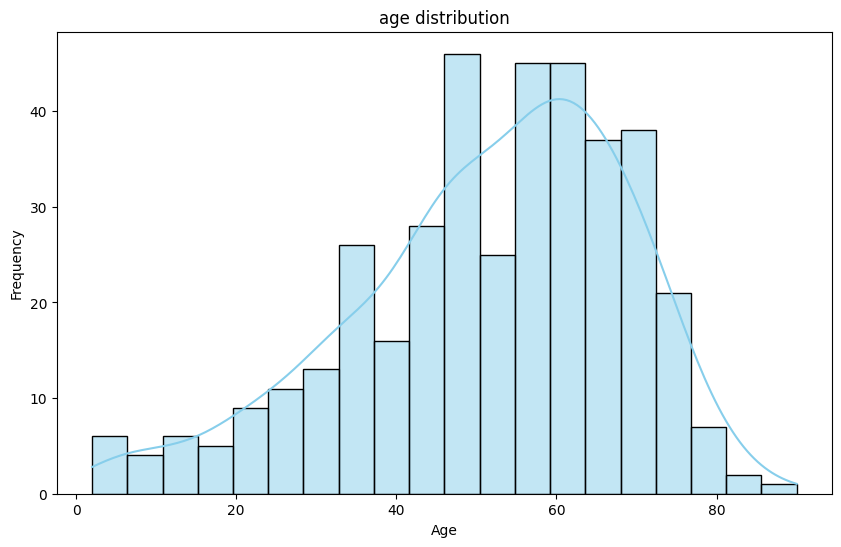

In [130]:
plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(), kde = True, bins = 20, color = 'skyblue')
plt.title("age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

hypertension
no     251
yes    147
Name: count, dtype: int64


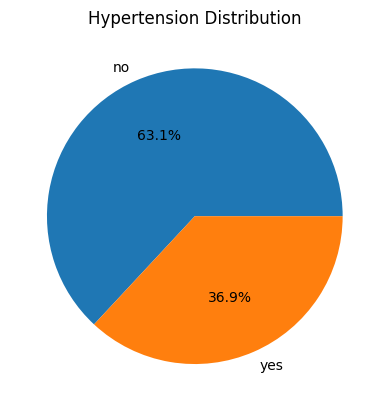

In [131]:
counts = df['hypertension'].value_counts()
print(counts)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Hypertension Distribution")
plt.show()

<Axes: xlabel='class', ylabel='blood_urea'>

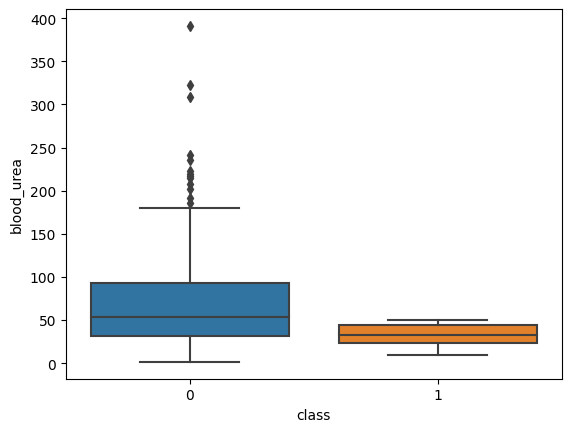

In [132]:
sns.boxplot(x = 'class', y = 'blood_urea', data = df)

*there are outliers*

<Axes: xlabel='class', ylabel='serum_creatinine'>

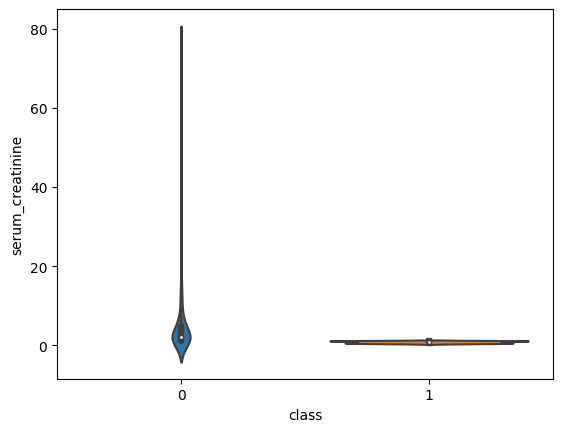

In [133]:
sns.violinplot(x = 'class', y = 'serum_creatinine', data = df)

<Axes: xlabel='aanemia', ylabel='count'>

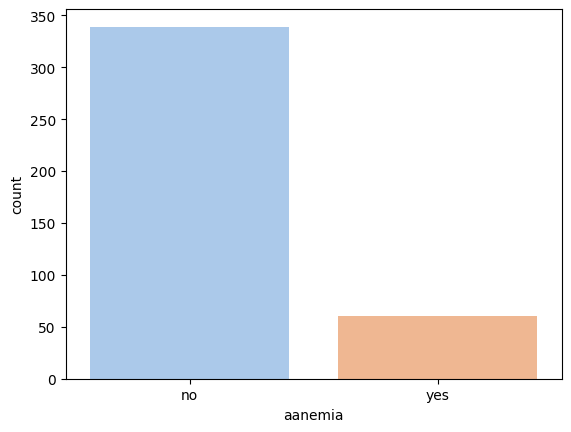

In [134]:
sns.countplot(x = 'aanemia', data  = df, palette = 'pastel')

<Axes: ylabel='count'>

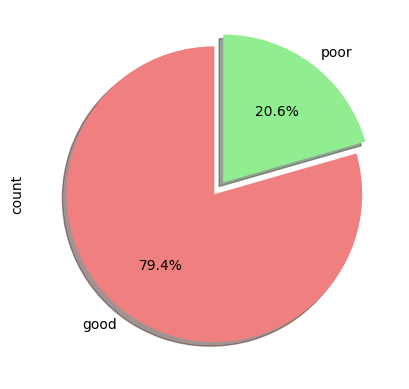

In [135]:
df.appetite.value_counts().plot.pie(autopct = "%1.1f%%", colors = ['lightcoral', 'lightgreen'], explode = (0,0.1), startangle = 90, shadow = True)

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

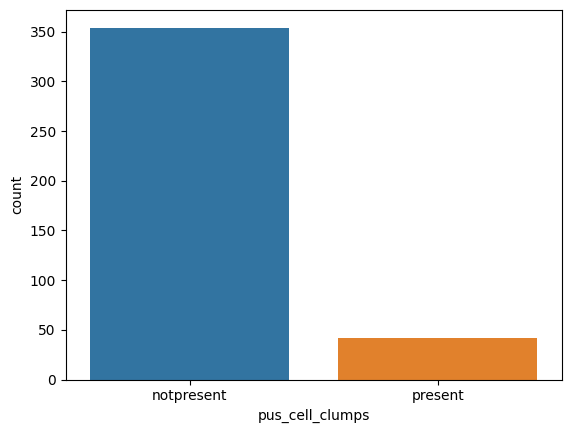

In [136]:
sns.countplot(x = 'pus_cell_clumps', data = df)

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

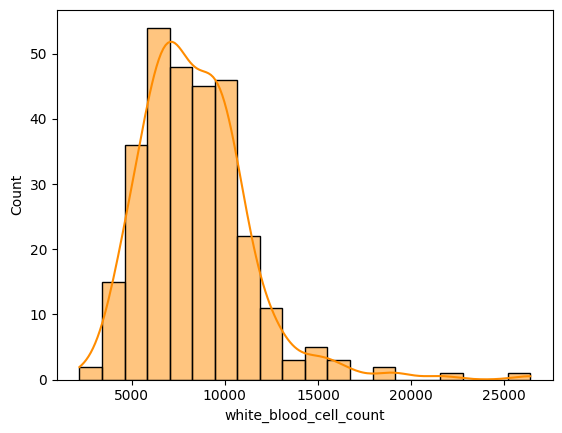

In [137]:
sns.histplot(df['white_blood_cell_count'].dropna(), bins = 20, kde = True, color = 'darkorange')

<Axes: ylabel='count'>

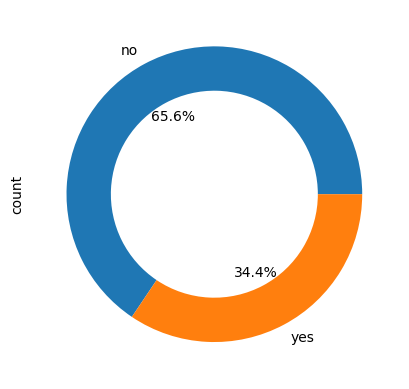

In [138]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = '%1.1f%%', wedgeprops = dict(width = 0.3))

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

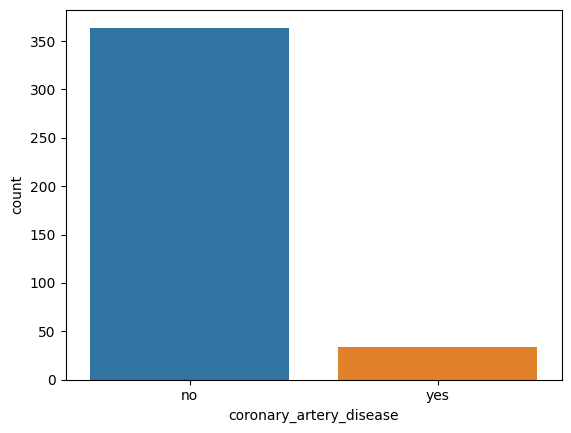

In [139]:
sns.countplot(x = 'coronary_artery_disease', data = df)

<Axes: xlabel='peda_edema', ylabel='count'>

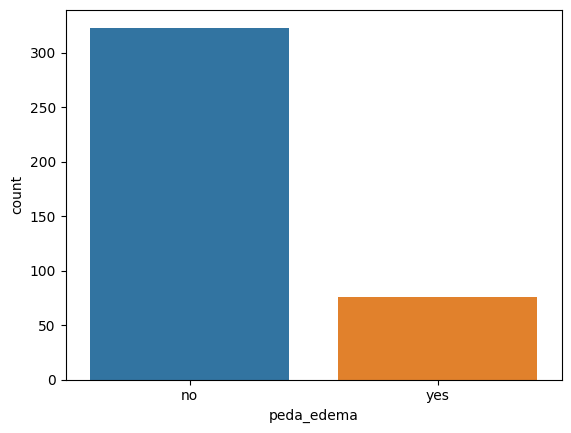

In [140]:
sns.countplot(x = 'peda_edema', data = df)

<Axes: xlabel='bacteria', ylabel='count'>

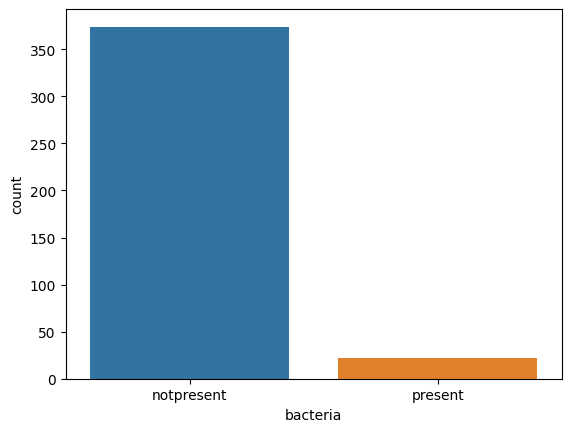

In [141]:
sns.countplot(x = 'bacteria', data=df)

# bivariate analysis

Text(0.5, 1.0, 'Age vs Blood Pressure')

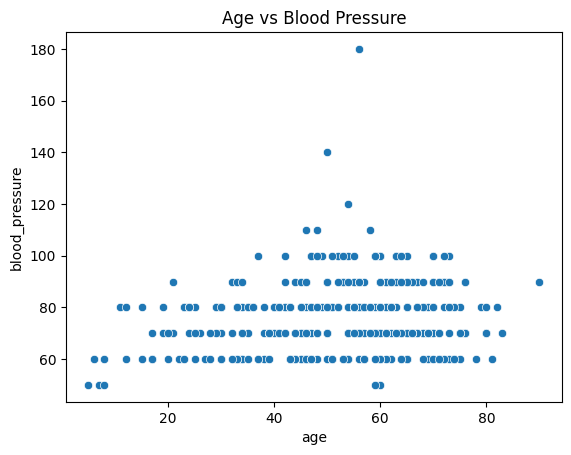

In [149]:
sns.scatterplot(x='age', y='blood_pressure', data=df)
plt.title("Age vs Blood Pressure")

<Axes: xlabel='age', ylabel='blood_pressure'>

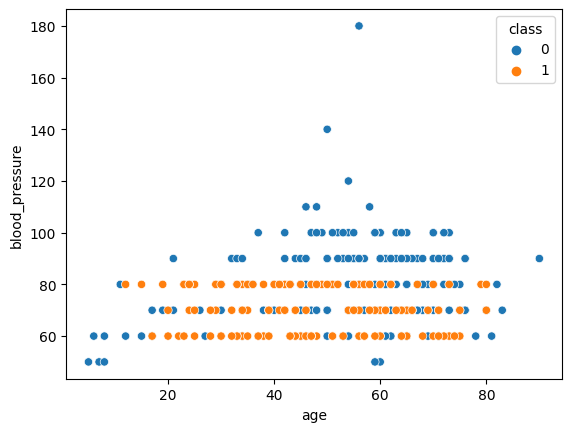

In [151]:
sns.scatterplot(x='age', y='blood_pressure',hue = 'class', data=df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

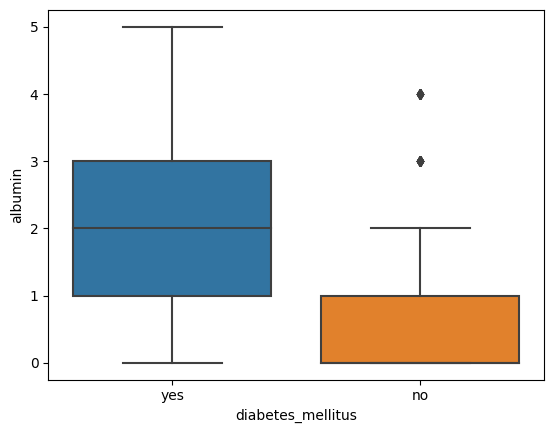

In [152]:
sns.boxplot(x = 'diabetes_mellitus', y = 'albumin', data =df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

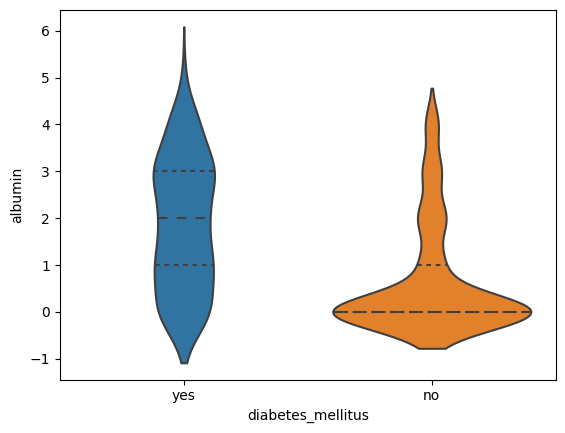

In [153]:
sns.violinplot(x = 'diabetes_mellitus', y = 'albumin', data =df, inner= 'quartile')

In [155]:
pd.crosstab(df['diabetes_mellitus'], df['hypertension'])

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mellitus'>

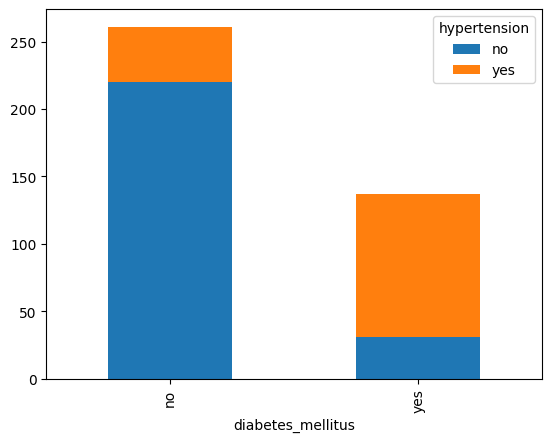

In [154]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])

diabetes_hypertension.plot(kind = 'bar', stacked = True)

# multivariate analysis

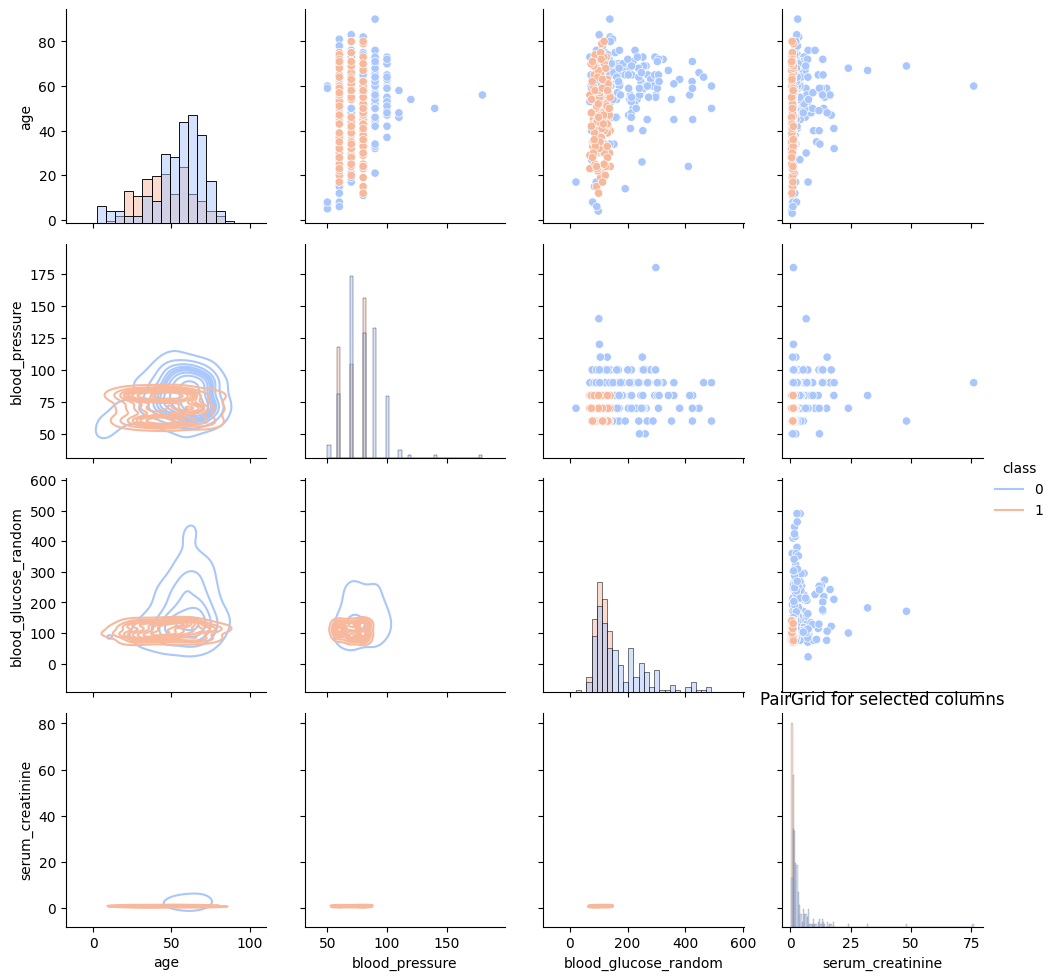

In [158]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

g = sns.PairGrid(df[cols], hue='class', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("PairGrid for selected columns")
plt.show()

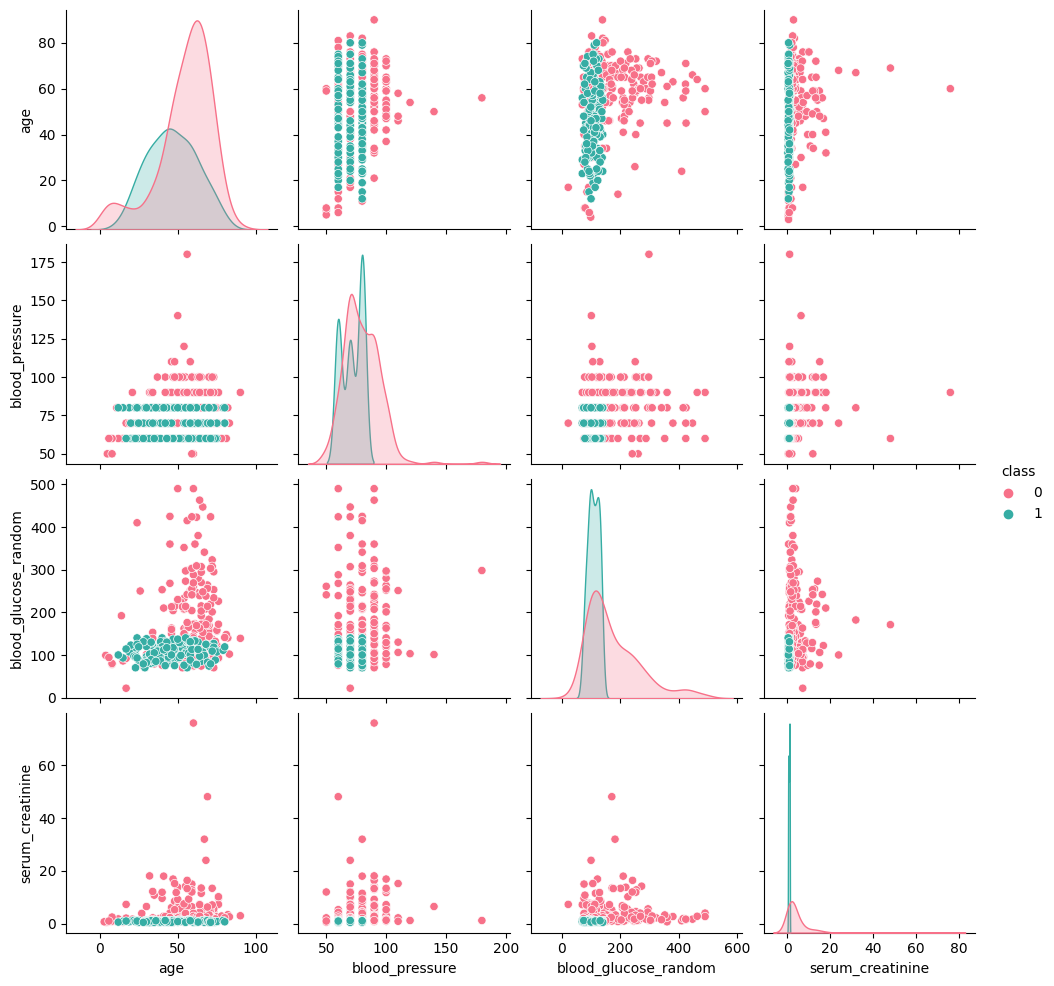

In [159]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
sns.pairplot(df[cols], hue = 'class', palette = 'husl')

In [160]:
df.corr(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,-0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,-0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,-0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,-0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,-0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,-0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,-0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,-0.084541


<Axes: >

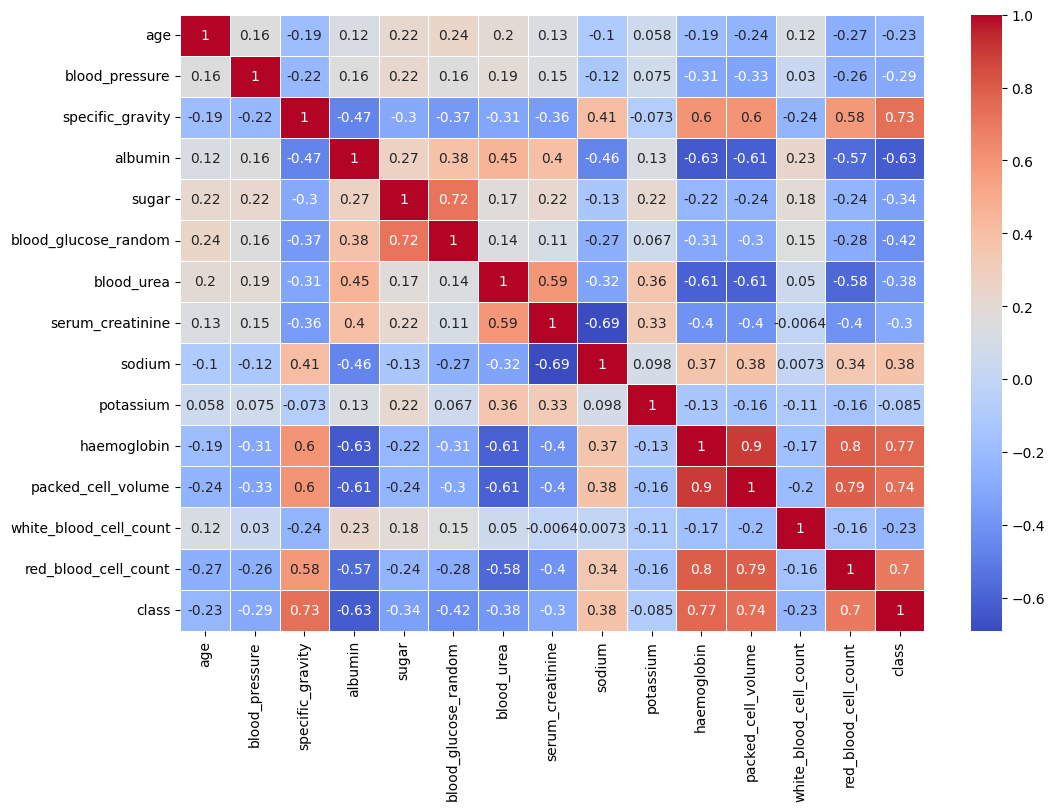

In [162]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5)
#annot=True → writes the correlation numbers inside each cell of the heatmap.

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

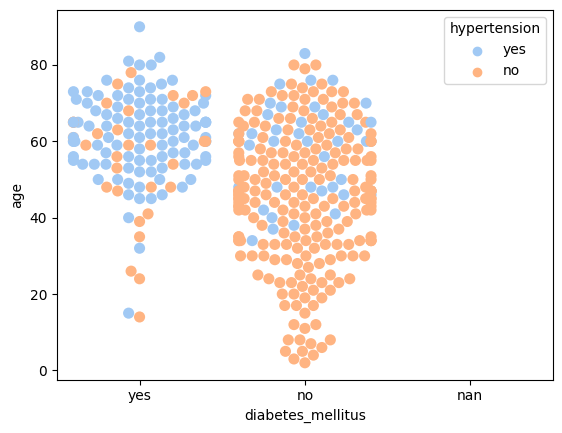

In [163]:
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)

In [165]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data = ['serum_creatinine', 'haemoglobin'],title = "interactive scatterplot with hover information")
fig.show()

In [166]:
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure',z = 'serum_creatinine', color = 'class', title = "3d scatter plot scatterplot")
fig.show()

In [167]:
import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data =go.Heatmap(z = data_corr.values,
                          x = data_corr.columns,
                          y=data_corr.index))
fig.show()

In [168]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()

In [170]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [171]:
#numerical cols
median_values = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(median_values)

In [172]:
#categorical cols
mode_values = df.mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values)

In [173]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [174]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [175]:
#encoding
from sklearn.preprocessing import LabelEncoder

In [176]:
LabelEncoder = LabelEncoder()
for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [177]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [178]:
X = df.drop('class', axis = 1)
y = df['class']